# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

# Load Data

In [2]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [3]:
#  Loading Data

path = "dataset_kemiskinan.xlsx"
load_data = pd.read_excel(path)

# Data Understanding

### Variabel:
- Tahun
- Kota
- Persentase Penduduk Miskin
- Pengangguran
- RLS : Rata-rata lama sekolah
- PP : pengeluaran perkapita
- IPM : Indeks Pembangunan Manusia

In [4]:
# Membuat data frame

df=pd.DataFrame(load_data)
df.head()

,Tahun,Kota,Persentase Penduduk Miskin,Pengangguran,RLS,PP,IPM
0,2022,Kep. Seribu,14.11,8.47,9.02,12999,72.79
1,2022,Jakarta Selatan,3.52,5.63,11.66,24221,85.21
2,2022,Jakarta Timur,4.30,8.39,11.73,18199,83.45
3,2022,Jakarta Pusat,4.90,5.88,11.53,17765,82.11
4,2022,Jakarta Barat,4.22,7.10,11.13,21357,82.51


In [5]:
# Melihat korelasi untuk menambah insight terkait data

df_cor = df[['Persentase Penduduk Miskin', 'Pengangguran', 'RLS', 'PP', 'IPM']]
df_cor.head()

,Persentase Penduduk Miskin,Pengangguran,RLS,PP,IPM
0,14.11,8.47,9.02,12999,72.79
1,3.52,5.63,11.66,24221,85.21
2,4.30,8.39,11.73,18199,83.45
3,4.90,5.88,11.53,17765,82.11
4,4.22,7.10,11.13,21357,82.51


<Axes: title={'center': 'Pearson Corelation'}>

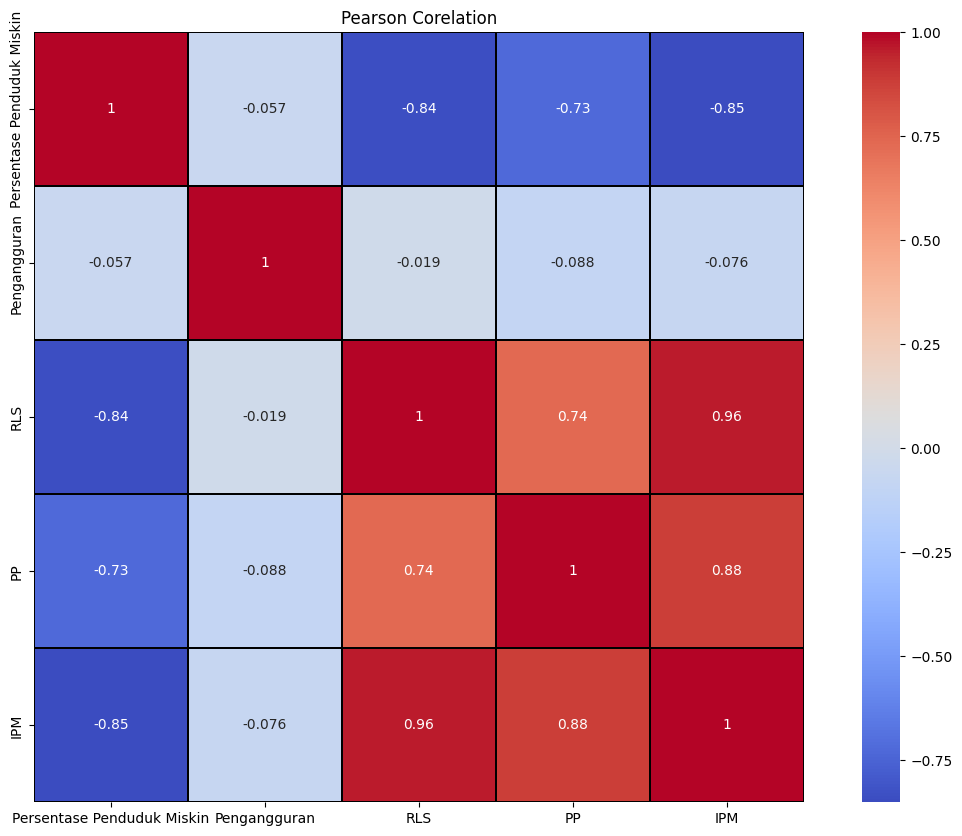

In [6]:
f,ax= plt.subplots(figsize=(15,10))
plt.title("Pearson Corelation")
sns.heatmap(df_cor.astype(float).corr(), linewidth=0.25, vmax=1.0, square=True, cmap="coolwarm", linecolor='black', annot=True)

# Data Cleansing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Tahun                       72 non-null     int64  
 1   Kota                        72 non-null     object 
 2   Persentase Penduduk Miskin  72 non-null     float64
 3   Pengangguran                72 non-null     float64
 4   RLS                         72 non-null     float64
 5   PP                          72 non-null     int64  
 6   IPM                         72 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 4.1+ KB


In [8]:
df.isnull().sum()

Tahun                         0
Kota                          0
Persentase Penduduk Miskin    0
Pengangguran                  0
RLS                           0
PP                            0
IPM                           0
dtype: int64

# Pemodelan : K-Means

In [9]:
from sklearn.cluster import KMeans

In [10]:
# Input

x = df[['Persentase Penduduk Miskin','Pengangguran','RLS','PP',"IPM"]]


C:\Users\anasafira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\anasafira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\anasafira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto'

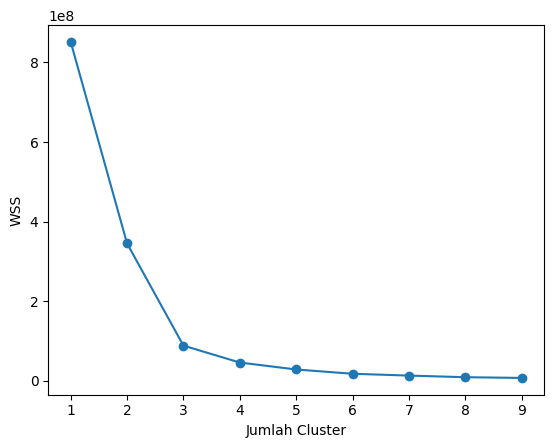

In [11]:
# Elbow Method : mencari nilai K

cluster_range=range(1,10)
cluster_wss=[]
for num_cluster in cluster_range:
  clusters=KMeans(num_cluster)
  clusters.fit(x)
  cluster_wss.append(clusters.inertia_)

plt.xlabel('Jumlah Cluster')
plt.ylabel('WSS')
plt.plot(cluster_range, cluster_wss, marker="o")
plt.show()

In [37]:
# memasukkan nilai K
cls=KMeans(n_clusters=3, random_state=42)

# membentuk model
model_cls=cls.fit(x)

C:\Users\anasafira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



# Hasil Modeling : K-Means



In [38]:
df['cluster_kmeans']=model_cls.labels_
df

,Tahun,Kota,Persentase Penduduk Miskin,Pengangguran,RLS,PP,IPM,cluster_kmeans,cluster_agg
0,2022,Kep. Seribu,14.11,8.47,9.02,12999,72.79,2,0
1,2022,Jakarta Selatan,3.52,5.63,11.66,24221,85.21,1,1
2,2022,Jakarta Timur,4.30,8.39,11.73,18199,83.45,0,0
3,2022,Jakarta Pusat,4.90,5.88,11.53,17765,82.11,0,0
4,2022,Jakarta Barat,4.22,7.10,11.13,21357,82.51,1,1
...,...,...,...,...,...,...,...,...,...
67,2011,Jakarta Selatan,3.43,10.36,10.81,20744,81.22,1,1
68,2011,Jakarta Timur,3.06,10.95,10.93,15563,78.82,0,0
69,2011,Jakarta Pusat,3.56,11.21,10.67,15362,77.97,0,0
70,2011,Jakarta Barat,3.44,10.72,9.82,17436,77.41,0,0


In [39]:
df['cluster_kmeans'].value_counts()

cluster_kmeans
0    43
1    17
2    12
Name: count, dtype: int64

In [40]:
cluster_counts = df.groupby(['Kota', 'cluster_kmeans']).size().unstack(fill_value=0)
print(cluster_counts)

cluster_kmeans    0   1   2
Kota                       
Jakarta Barat     7   5   0
Jakarta Pusat    12   0   0
Jakarta Selatan   0  12   0
Jakarta Timur    12   0   0
Jakarta Utara    12   0   0
Kep. Seribu       0   0  12


# Evaluasi : K-Means

### silhouette score : skala -1 sampai 1, dimana mendekati 1 berarti hasilnya baik

In [41]:
silhouette_avg = silhouette_score(x, df['cluster_kmeans'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6879438744081915


### davies_bouldin : skala 0 sampai tak hingga, dimana mendekati 0 berarti hasilnya baik

In [42]:
davies_bouldin_index = davies_bouldin_score(x, df['cluster_kmeans'])
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Davies-Bouldin Index: 0.3751927284278531


In [43]:
import plotly.express as px

In [44]:
fig = px.scatter(df, 
                 x='Persentase Penduduk Miskin',  
                 y="PP", 
                 color='cluster_kmeans',
                 size='Pengangguran', 
                 hover_data=['Kota'])

fig.show()

# Kesimpulan
- Cluster Kuning (2) adalah prioritas 1
- Cluster Biru (0) adalah prioritas 2
- Cluster Pink (3) adalah prioritas 3

# Mengeksplor Cluster

## Cluster Prioritas 1

In [45]:
Cluster_P1 = df[df['cluster_kmeans']== 2]
Cluster_P1.head()

,Tahun,Kota,Persentase Penduduk Miskin,Pengangguran,RLS,PP,IPM,cluster_kmeans,cluster_agg
0,2022,Kep. Seribu,14.11,8.47,9.02,12999,72.79,2,0
6,2021,Kep. Seribu,15.06,8.58,8.81,12587,72.10,2,0
12,2020,Kep. Seribu,14.87,7.37,8.68,12412,71.63,2,0
18,2019,Kep. Seribu,12.09,5.44,8.47,12623,71.40,2,0
24,2018,Kep. Seribu,11.98,5.33,8.46,12264,70.91,2,0


In [46]:
Cluster_P1.describe()

,Tahun,Persentase Penduduk Miskin,Pengangguran,RLS,PP,IPM,cluster_kmeans,cluster_agg
count,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000,12.0,12.0
mean,2016.500000,12.538333,7.723333,8.28000,11846.750000,69.690000,2.0,0.0
std,3.605551,1.425424,2.706864,0.42574,720.102786,2.197623,0.0,0.0
min,2011.000000,11.010000,5.330000,7.58000,10653.000000,65.790000,2.0,0.0
25%,2013.750000,11.597500,5.462500,8.02000,11300.250000,68.265000,2.0,0.0
50%,2016.500000,12.035000,7.350000,8.24500,11720.500000,69.900000,2.0,0.0
75%,2019.250000,13.262500,8.497500,8.52250,12455.750000,71.457500,2.0,0.0
max,2022.000000,15.060000,13.970000,9.02000,12999.000000,72.790000,2.0,0.0


### Parameter :
- Pengangguran Nasional 5.32%
- RLS Indonesia sesuai UUD 12 Tahun
- PP menurut BPS RP.17.851
- IPM UNDP Kategori
-- sangat tinggi	: IPM ≥ 80
-- Kategori tinggi		: 70 ≤ IPM < 80
-- Kategori sedang	: 60 ≤ IPM < 70
-- Kategori rendah		: IPM < 60

## Cluster Prioritas 2

In [47]:
Cluster_P2 = df[df['cluster_kmeans']== 0]
Cluster_P2.head()

,Tahun,Kota,Persentase Penduduk Miskin,Pengangguran,RLS,PP,IPM,cluster_kmeans,cluster_agg
2,2022,Jakarta Timur,4.30,8.39,11.73,18199,83.45,0,0
3,2022,Jakarta Pusat,4.90,5.88,11.53,17765,82.11,0,0
5,2022,Jakarta Utara,7.24,8.04,10.82,19201,80.81,0,0
8,2021,Jakarta Timur,4.28,8.23,11.67,17733,82.97,0,0
9,2021,Jakarta Pusat,4.94,7.75,11.39,17365,81.56,0,0


In [48]:
Cluster_P2.describe()

,Tahun,Persentase Penduduk Miskin,Pengangguran,RLS,PP,IPM,cluster_kmeans,cluster_agg
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.0,43.0
mean,2016.093023,4.172093,8.502558,10.809535,17366.534884,79.952326,0.0,0.0
std,3.428271,1.115908,1.586353,0.612186,1146.698623,1.725430,0.0,0.0
min,2011.000000,3.060000,5.880000,9.780000,15362.000000,76.120000,0.0,0.0
25%,2013.000000,3.410000,7.310000,10.295000,16474.000000,78.810000,0.0,0.0
50%,2016.000000,3.700000,8.400000,10.850000,17339.000000,80.170000,0.0,0.0
75%,2019.000000,4.990000,9.300000,11.285000,18271.500000,81.125000,0.0,0.0
max,2022.000000,7.240000,11.790000,11.730000,19695.000000,83.450000,0.0,0.0


# Cluster Prioritas 3

In [49]:
Cluster_P3 = df[df['cluster_kmeans']== 1]
Cluster_P3.head()

,Tahun,Kota,Persentase Penduduk Miskin,Pengangguran,RLS,PP,IPM,cluster_kmeans,cluster_agg
1,2022,Jakarta Selatan,3.52,5.63,11.66,24221,85.21,1,1
4,2022,Jakarta Barat,4.22,7.10,11.13,21357,82.51,1,1
7,2021,Jakarta Selatan,3.56,7.33,11.64,23888,84.90,1,1
10,2021,Jakarta Barat,4.31,9.06,10.78,20801,81.76,1,1
13,2020,Jakarta Selatan,3.43,10.79,11.63,23575,84.72,1,1


In [50]:
Cluster_P3.describe()

,Tahun,Persentase Penduduk Miskin,Pengangguran,RLS,PP,IPM,cluster_kmeans,cluster_agg
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0,17.0
mean,2017.529412,3.558235,7.781765,11.126471,22223.470588,83.046471,1.0,1.0
std,3.502100,0.459541,2.016945,0.442676,1317.954007,1.496245,0.0,0.0
min,2011.000000,2.730000,5.000000,10.380000,20298.000000,80.880000,1.0,1.0
25%,2015.000000,3.390000,6.360000,10.810000,20875.000000,81.720000,1.0,1.0
50%,2018.000000,3.470000,7.330000,11.130000,22208.000000,82.940000,1.0,1.0
75%,2020.000000,3.560000,8.960000,11.570000,23363.000000,84.440000,1.0,1.0
max,2022.000000,4.310000,12.270000,11.660000,24221.000000,85.210000,1.0,1.0


# Modeling : Agglomerative Clustering

In [54]:
from sklearn.cluster import AgglomerativeClustering

# Input
x1 = df[['Persentase Penduduk Miskin','Pengangguran','RLS','PP',"IPM"]]


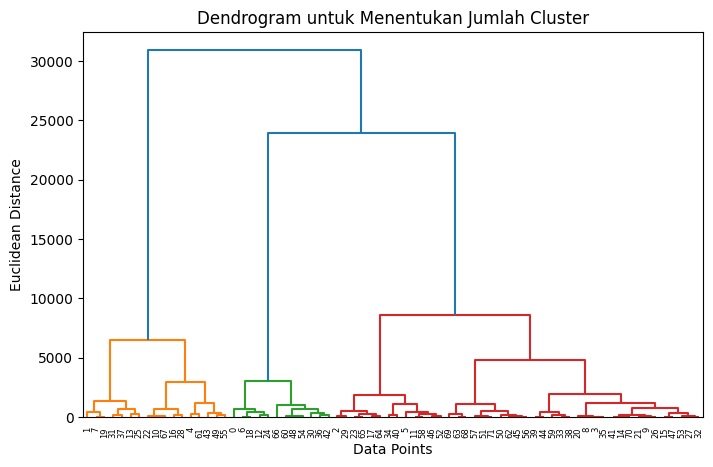

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Buat dendrogram
plt.figure(figsize=(8, 5))
dendrogram = sch.dendrogram(sch.linkage(x1, method='ward'))
plt.title('Dendrogram untuk Menentukan Jumlah Cluster')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


In [55]:

agg_clustering = AgglomerativeClustering(n_clusters=3)
df['cluster_agg'] = agg_clustering.fit_predict(x1)

# Hasil Modeling : Agglomerative Clustering

In [56]:
print(df['cluster_agg'].value_counts())

cluster_agg
0    43
1    17
2    12
Name: count, dtype: int64


In [57]:
cluster_counts = df.groupby(['Kota', 'cluster_agg']).size().unstack(fill_value=0)
print(cluster_counts)

cluster_agg       0   1   2
Kota                       
Jakarta Barat     7   5   0
Jakarta Pusat    12   0   0
Jakarta Selatan   0  12   0
Jakarta Timur    12   0   0
Jakarta Utara    12   0   0
Kep. Seribu       0   0  12


# Evaluasi : Agglomerative Clustering

### silhouette score : skala -1 sampai 1

In [59]:
silhouette_avg = silhouette_score(x1, df['cluster_agg'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6879438744081915


### davies_bouldin : skala 0 sampai tak hingga

In [62]:
davies_bouldin_index = davies_bouldin_score(x1, df['cluster_agg'])
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Davies-Bouldin Index: 0.3751927284278531


In [63]:
fig = px.scatter(df, x='Persentase Penduduk Miskin', y="PP", color='cluster_agg',
                 size='Pengangguran', hover_data=['Kota'])
fig.show()

In [ ]:
# Export to Excel

#Export as download if in colab
# from google.colab import files

# file_clustering_poverty_jakarta=df_new.to_excel('file_clustering_poverty_jakarta.xlsx', sheet_name='predict')
# files.download('file_clustering_poverty_jakarta.xlsx')

In [64]:
df

,Tahun,Kota,Persentase Penduduk Miskin,Pengangguran,RLS,PP,IPM,cluster_kmeans,cluster_agg
0,2022,Kep. Seribu,14.11,8.47,9.02,12999,72.79,2,2
1,2022,Jakarta Selatan,3.52,5.63,11.66,24221,85.21,1,1
2,2022,Jakarta Timur,4.30,8.39,11.73,18199,83.45,0,0
3,2022,Jakarta Pusat,4.90,5.88,11.53,17765,82.11,0,0
4,2022,Jakarta Barat,4.22,7.10,11.13,21357,82.51,1,1
...,...,...,...,...,...,...,...,...,...
67,2011,Jakarta Selatan,3.43,10.36,10.81,20744,81.22,1,1
68,2011,Jakarta Timur,3.06,10.95,10.93,15563,78.82,0,0
69,2011,Jakarta Pusat,3.56,11.21,10.67,15362,77.97,0,0
70,2011,Jakarta Barat,3.44,10.72,9.82,17436,77.41,0,0


In [72]:
import pandas as pd
pd.set_option('display.max_rows', None)  # Menampilkan seluruh baris
pd.set_option('display.max_columns', None)  # Menampilkan seluruh kolom
print(df)  # Gantilah "dataframe" dengan nama variabel yang menyimpan data Anda


    Tahun             Kota  Persentase Penduduk Miskin  Pengangguran    RLS  \
0    2022      Kep. Seribu                       14.11          8.47   9.02   
1    2022  Jakarta Selatan                        3.52          5.63  11.66   
2    2022    Jakarta Timur                        4.30          8.39  11.73   
3    2022    Jakarta Pusat                        4.90          5.88  11.53   
4    2022    Jakarta Barat                        4.22          7.10  11.13   
5    2022    Jakarta Utara                        7.24          8.04  10.82   
6    2021      Kep. Seribu                       15.06          8.58   8.81   
7    2021  Jakarta Selatan                        3.56          7.33  11.64   
8    2021    Jakarta Timur                        4.28          8.23  11.67   
9    2021    Jakarta Pusat                        4.94          7.75  11.39   
10   2021    Jakarta Barat                        4.31          9.06  10.78   
11   2021    Jakarta Utara                        7.

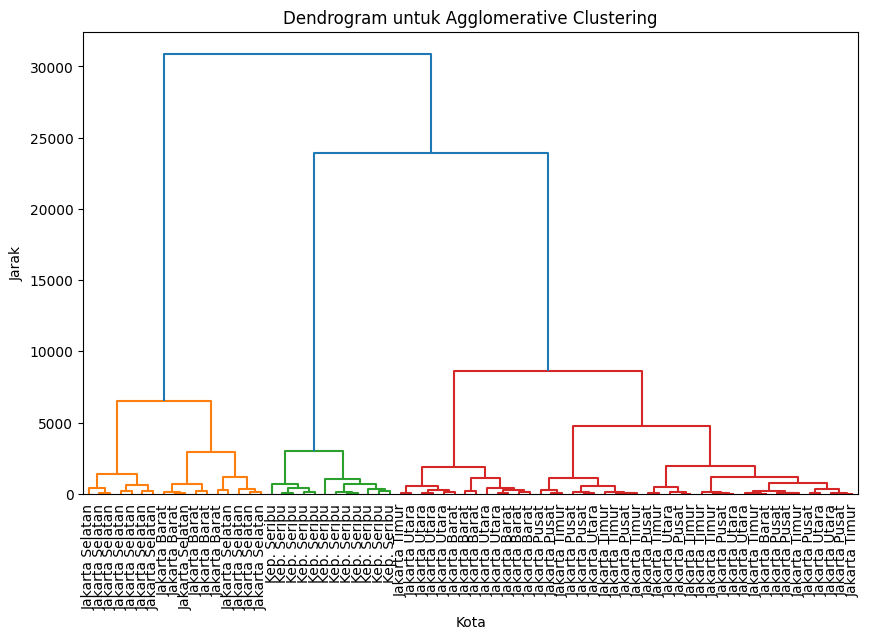

In [65]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(df[["Persentase Penduduk Miskin", "PP"]], method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, labels=df["Kota"].values, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram untuk Agglomerative Clustering")
plt.xlabel("Kota")
plt.ylabel("Jarak")
plt.show()


C:\Users\anasafira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\anasafira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\anasafira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_grou

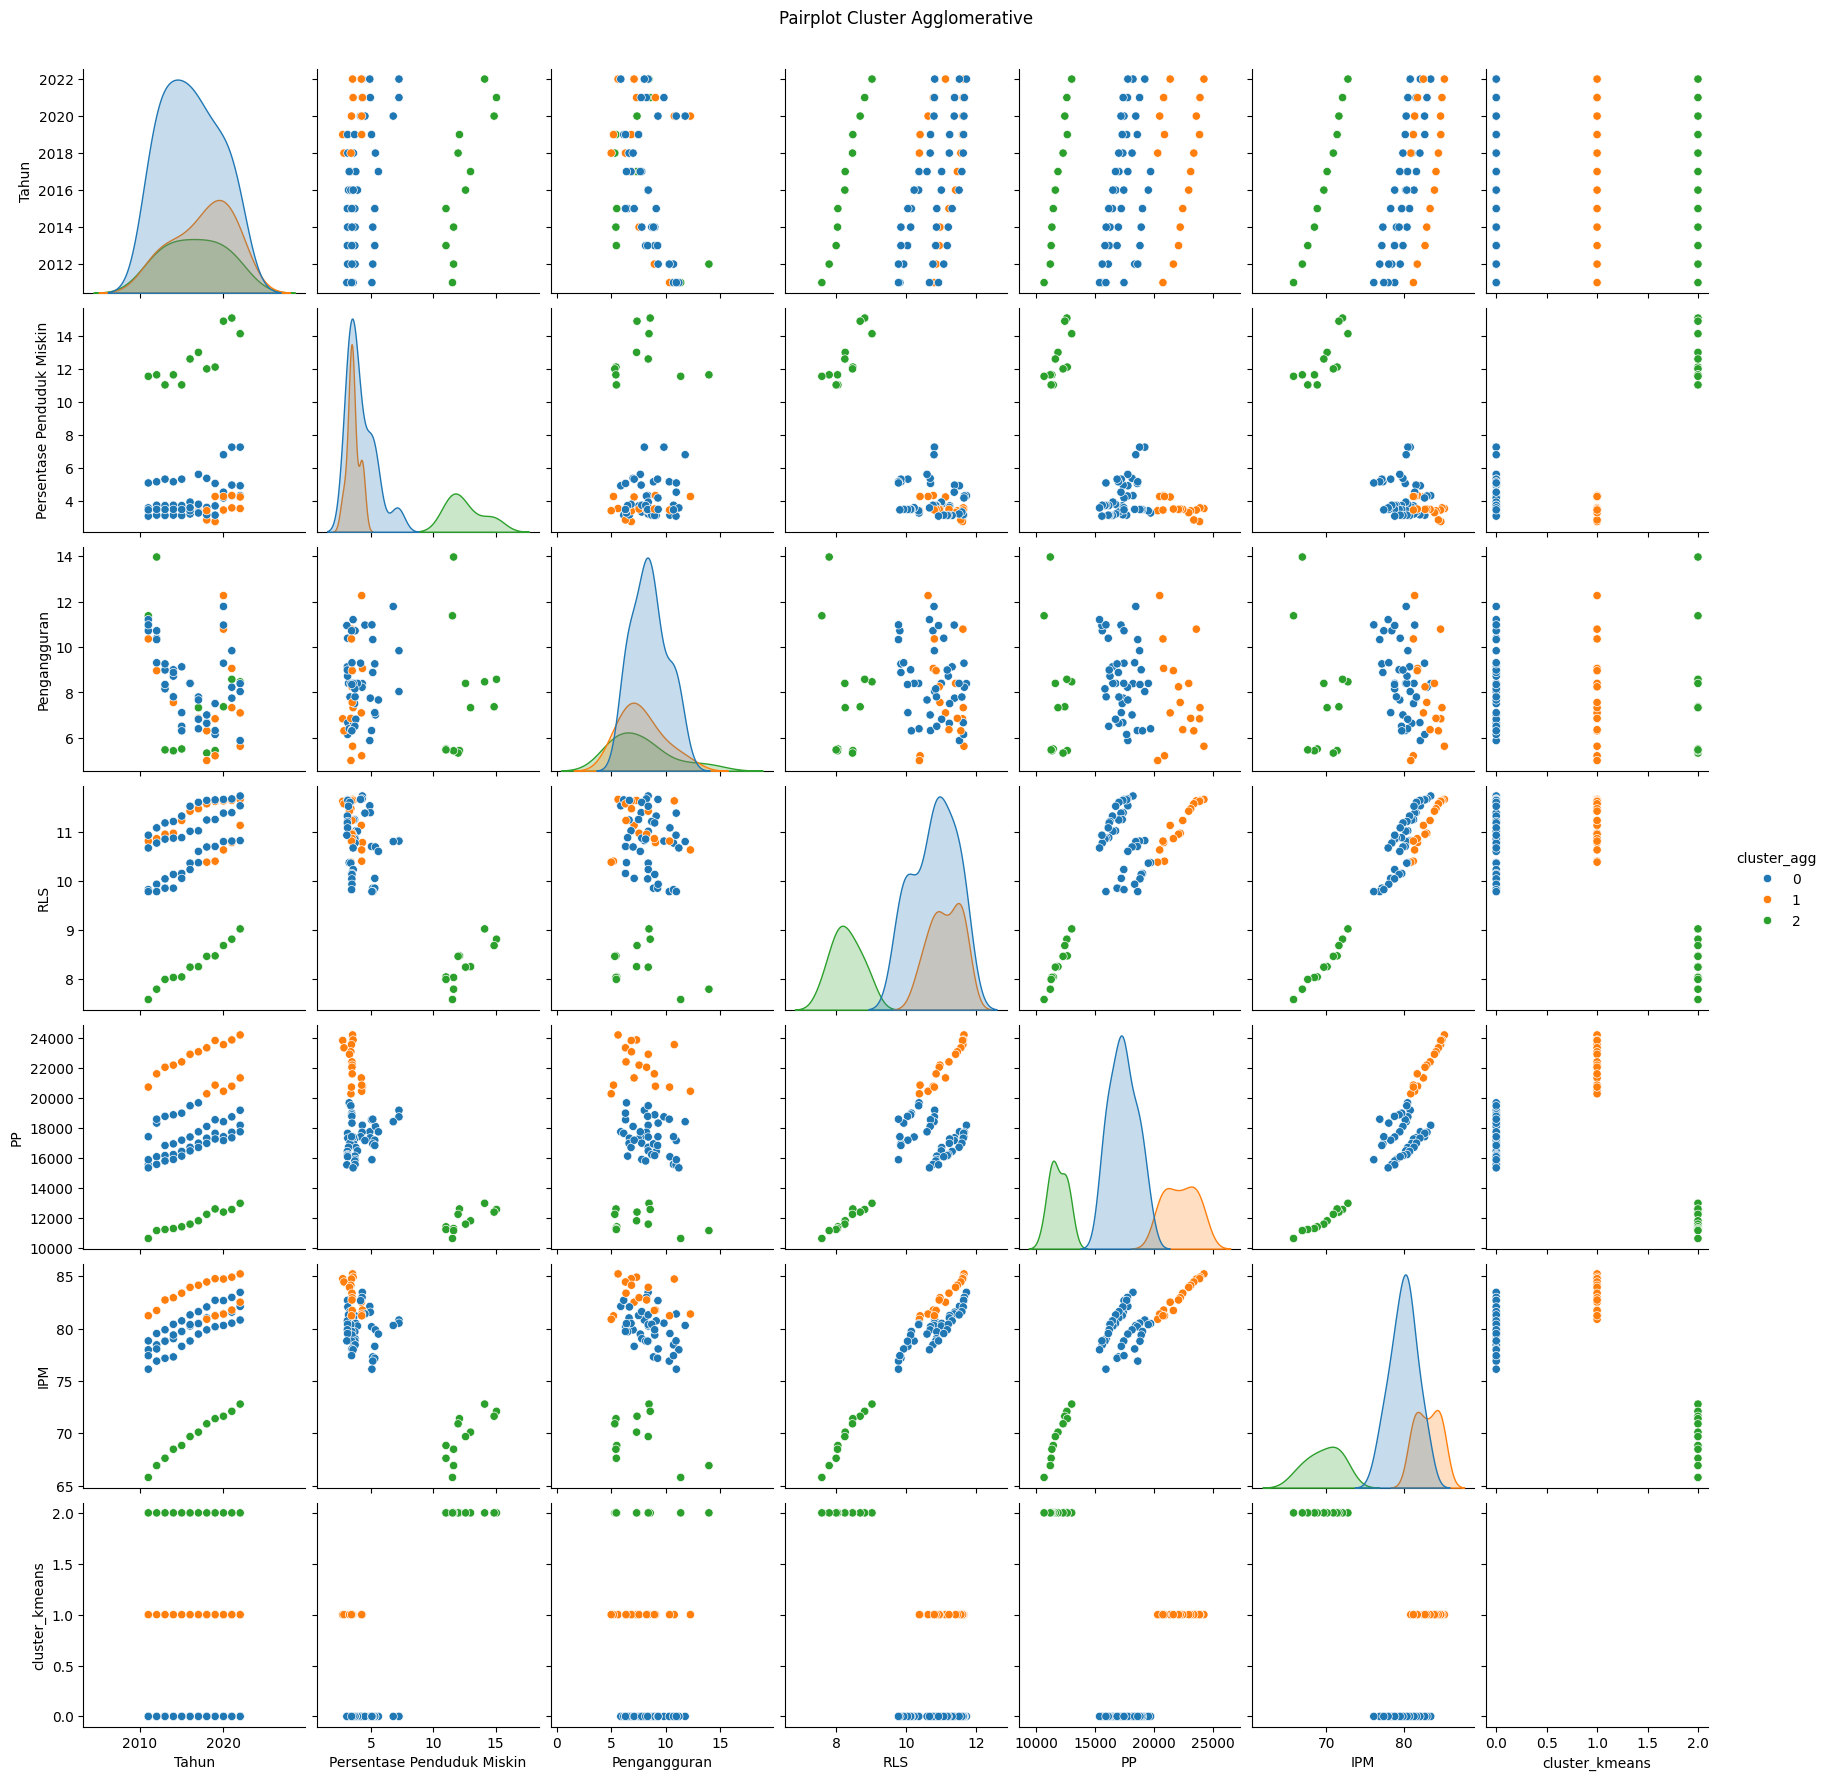

In [67]:
sns.pairplot(df, hue="cluster_agg", palette="tab10")
plt.suptitle("Pairplot Cluster Agglomerative", y=1.02)
plt.show()


# Kesimpulan
- Cluster Kuning (2) adalah prioritas 1 (Sangat Miskin) 
- Cluster Biru (0) adalah prioritas 2 (Miskin)
- Cluster Pink (3) adalah prioritas 3 (Rentan Miskin/Tidak Miskin)

1. Cluster "Sangat Miskin" (Prioritas 1)
Strategi Penanganan:

Peningkatan Akses Pendidikan dan Kesehatan:
Fokus pada penguatan pendidikan dasar dan layanan kesehatan di daerah ini. Pendidikan dasar dan kesehatan yang baik memiliki pengaruh besar terhadap upaya pengentasan kemiskinan dalam jangka panjang.
Penyediaan Bantuan Sosial:
Memberikan bantuan langsung kepada keluarga miskin untuk memenuhi kebutuhan dasar seperti pangan, perumahan, dan pendidikan.
Program Pelatihan Keterampilan:
Menyediakan pelatihan keterampilan kerja untuk meningkatkan daya saing penduduk di pasar kerja.
Subsidisasi Kesehatan dan Jaminan Sosial:
Menyediakan layanan kesehatan yang lebih terjangkau, termasuk asuransi kesehatan, untuk mengurangi beban keuangan keluarga miskin.
Alasan:
Penduduk di cluster ini menunjukkan tingkat kemiskinan yang sangat tinggi (misalnya, lebih dari 10%) dan tingkat pengangguran yang besar. Mereka membutuhkan intervensi langsung untuk memenuhi kebutuhan dasar mereka dan membuka peluang untuk perbaikan ekonomi. (Sumber: World Bank, 2021; UNDP, 2020)

2. Cluster "Miskin" (Prioritas 2)
Strategi Penanganan:

Pengembangan Infrastruktur Ekonomi:
Meningkatkan infrastruktur dasar seperti jalan, listrik, dan transportasi untuk membuka akses ke pasar dan peluang kerja yang lebih banyak.
Pemberdayaan Ekonomi Lokal:
Mengembangkan usaha mikro, kecil, dan menengah (UMKM) serta memberikan modal usaha kepada masyarakat untuk mendorong kewirausahaan dan lapangan kerja lokal.
Pengembangan Program Keterampilan dan Pendidikan Lanjutan:
Meningkatkan kualitas keterampilan kerja dan pendidikan lanjut agar penduduk dapat beradaptasi dengan kebutuhan pasar kerja yang lebih luas.
Program Kesehatan Preventif:
Menyediakan program kesehatan preventif dan penyuluhan gizi untuk mengurangi pengeluaran terkait masalah kesehatan yang dapat memperburuk kemiskinan.
Alasan:
Penduduk di cluster ini menunjukkan kemiskinan yang sedang, tetapi tidak berada pada kondisi yang sangat buruk. Oleh karena itu, pendekatan ini bertujuan untuk meningkatkan kondisi mereka dengan memberikan akses yang lebih banyak ke peluang ekonomi dan sosial. (Sumber: ADB, 2020; Bappenas, 2019)

